<div>
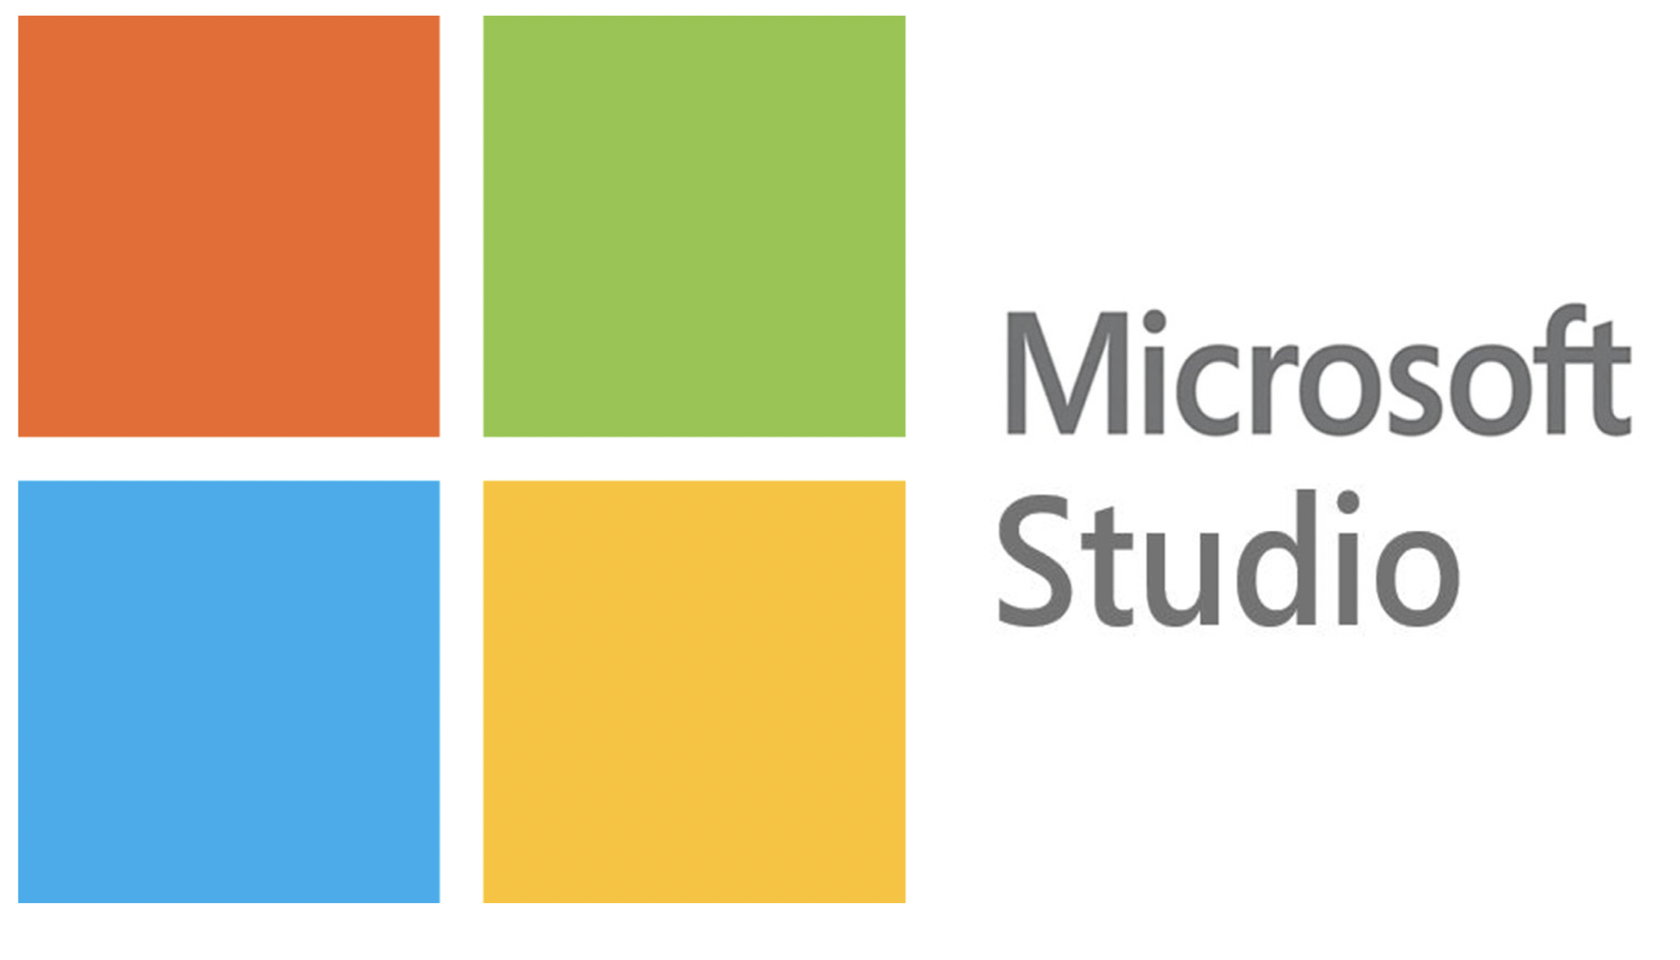
</div>

# Microsoft Movie Studio Recommendations

## Overview

This project uses data analysis to understand the performance of movie productions through various performance metrics in an effort to inform Microsoft executives about the most financially viable opportunities to enter the movie industry.

## Business Understanding

In 2019, prior to the pandemic, movie box office sales was at \\$11B, and in that same year there were over 1 billion tickets sold to the various films released at the time. The industry is recovering as we grow in our understanding of how to navigate the current environment with the coronavirus still prevalent. This year, box office sales are projected to be in excess of $6B with almost 750M tickets sold. (The numbers - https://www.the-numbers.com/market/)

The leadership of Microsoft is eager to learn about the potential to enter the movie industry with financial success in the near term. This analysis works to provide insight into important metrics of financial and public interest performance within the movie industry to better inform the Microsoft executive team as they determine their clear path forward to be a new entrant into the well established movie industry.

## Data Understanding

The information necessary to complete this detailed data analysis is gathered by various respected industry organizations. The datasets available for this analysis were sourced from the resources listed below:

 - [Box Office Mojo](https://www.boxofficemojo.com)
     * This dataset includes information about movie financial performance with gross domestic and foreign box office sales. The dataset includes information for 3,387 different titles.
 - [Rotten Tomatoes](https://www.rottentomatoes.com)
     * Movie info dataset: This dataset includes information regarding a synopsis, runtime, the director and writer team, release date (Theater and DVD), the production studio, genre, and the rating of the film. Altogether, the dataset includes information for 1,560 different titles.
     * Reviews dataset: This dataset includes information for movie reviews and ratings, along with the critic who is reviewing. In total, this data set provides information for 54,432 entries.
 - [TheMovieDB](https://www.themoviedb.org)
     * This dataset includes information about the genre, language, popularity, and release date of the various movies represented. The dataset includes 26,517 entries.
 - [The Numbers](https://www.the-numbers.com)
     * This dataset includes information about the release date, production budget, and the domestic and international gross sales. The dataset includes 5,782 entries.
 - [IMDB](https://www.imdb.com)
     * Principals: This dataset relationally connects to the other datasets from IMDB through movie ID, and person ID. This data set also include information particular to a persons role (e.g. if an actress is listed the category column shares the name of their character). This dataset has 1,028,186 entries    
    * Known for: This data set provides a list of each person available from the principals dataset and connects them to a movie that they are known for. In total this dataset has 1,638,259 entries.
    * Directors | Writers: These data sets create datasets from the principals dataset for the writers and directors of films and what films they are associated with. Directors has 291,174 entries and writers has 255,873 entries    
    * Persons: This dataset includes personal identifiable information such as their birth and death year along with their profession. This dataset includes 606,648 entries.
    * Movie Basics: This dataset includes information to identify a movie's foundational details such as the year it was released, the runtime and the genre of the film. This dataset has 146,144 entries. 
     * Movie Ratings: This dataset includes information about movie rating and the number of votes received by reviewers. This dataset includes 73,856 entries.
     * Movie Akas: This dataset includes information about the movie region, language, type and attribute. This dataset includes 331,703 entries.

Below, we will further explore the information available from the datasets that will be used to better understand the critical metrics of performance that will inform the Microsoft executive teams next steps.

In [3]:
# import the necessary support packages to manipulate the available information within the datasets 
import pandas as pd
import numpy as np

### Box Office Mojo

In [4]:
# load the box office mojo csv file as a pandas dataframe
box_office_mojo = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [5]:
# look at the information within the box office mojo dataset
box_office_mojo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


We now understand that the Box Office Mojo dataset has 5 columns of information that we have available to us to use for the analysis project. It is important to note that there are 3 data types represented in this dataset. Most importantly as we approach the data cleaning steps of this analysis we will want to critically look at the null values throughout the dataset. We can see that the title and year columns are fully represented with 3,387 entries, though the foreign_gross, domestic_gross, and studio columns have entries that are empty. Once we are to the data cleaning stage looking into the missing data will allow us to better understand how to address the empty cells.

In [6]:
# look at the first 5 rows of the box office mojo dataset
box_office_mojo.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Now we can begin to see the data that is available to purposefully assess the business problem. Now we will duplicate this process for the 4 additional datasets below

### Rotten Tomatoes

In [7]:
# load the rotten tomatoes movie info csv file as a pandas dataframe
RT_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')

In [8]:
# look at the information within the rotten tomatoes movie info dataset
RT_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [9]:
# look at the first 5 rows of the rotten tomoatoes movie info dataset
RT_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [10]:
# load the rotten tomatoes reviews csv file as a pandas dataframe
RT_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding= 'unicode_escape')

In [11]:
# look at the information within the rotten tomatoes reviews dataset
RT_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [12]:
# look at the first 5 rows of the rotten tomoatoes reviews dataset
RT_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


### The Movie Database

In [13]:
# load the the movie database csv file as a pandas dataframe
movie_database = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col = 0)

In [14]:
# look at the information within the movie database dataset
movie_database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [15]:
# look at the first 5 rows of the movie database dataset
movie_database.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### The Numbers

In [16]:
# load the the numbers movie budget csv file as a pandas dataframe
TN_movie_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [17]:
# look at the information within the numbers movie budget dataset
TN_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [18]:
# look at the first 5 rows of the numbers movie budget dataset
TN_movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### IMDB
The IMDB database is a dataframe that we will query to look into the layout of the data further. The data available through this database is summarized below in the Movie Data ERD image. 

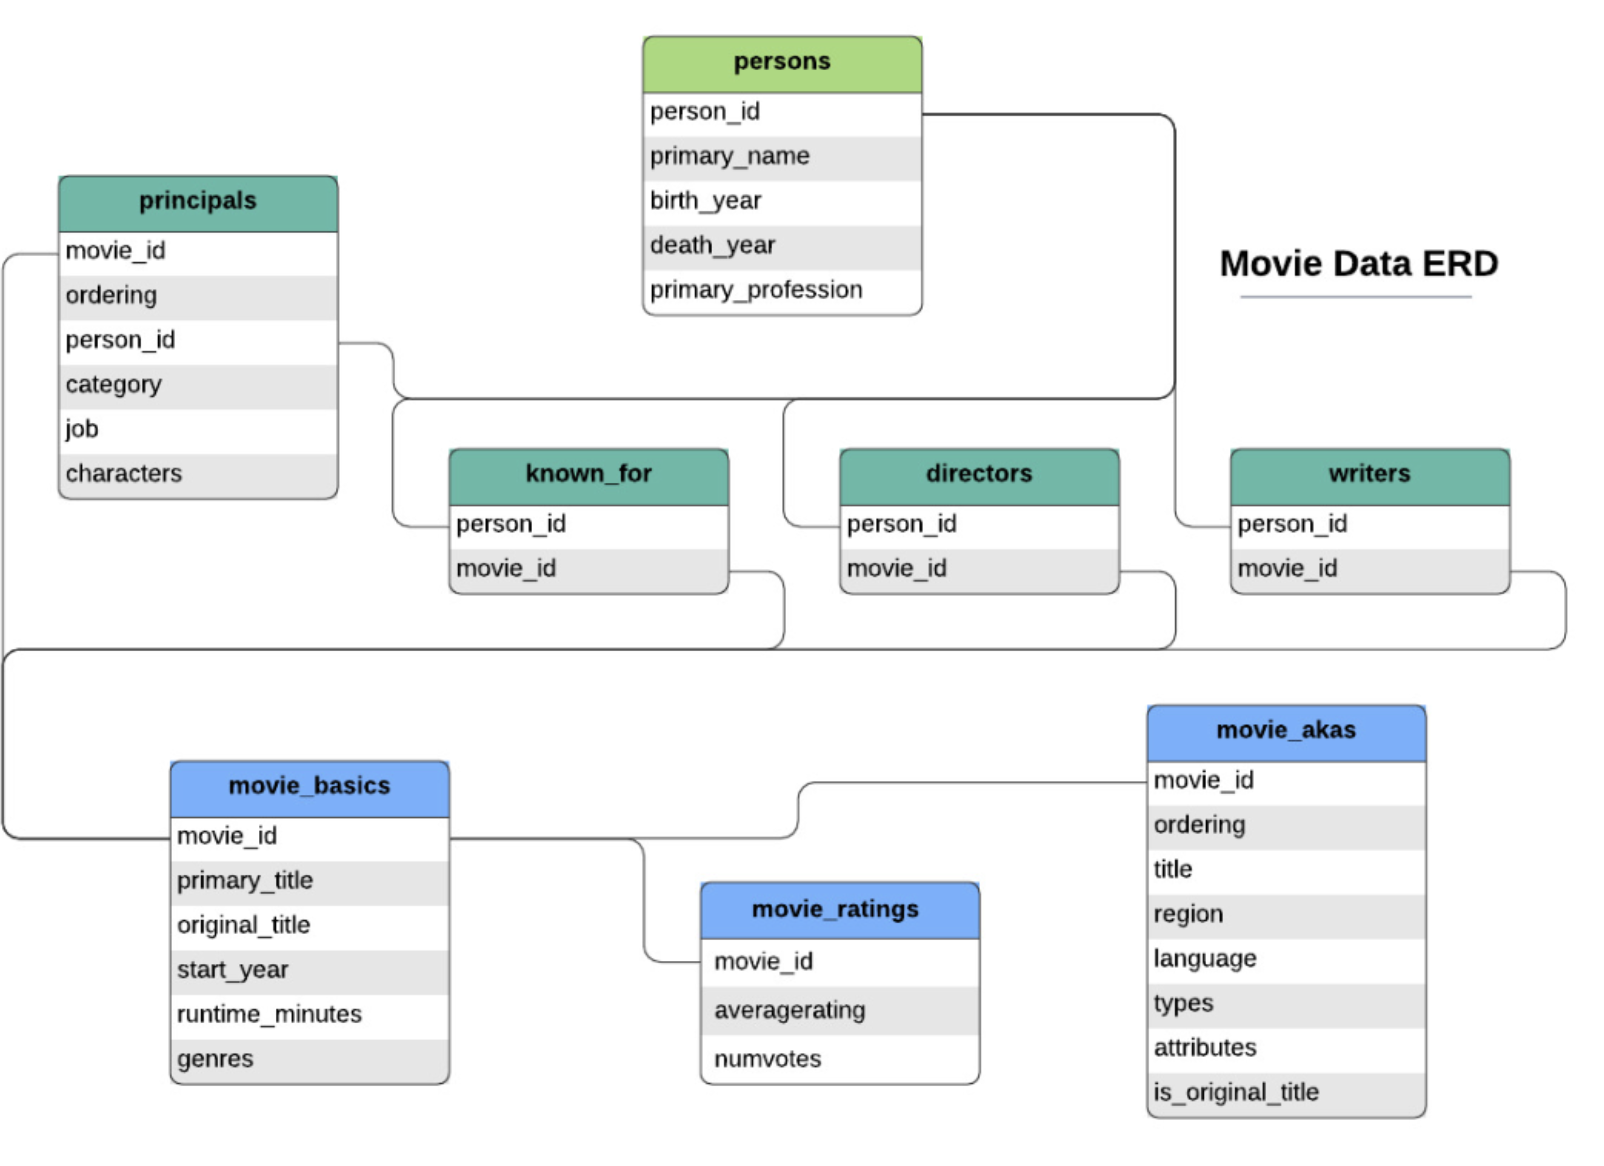

Below, we will further explore the information available from the IMDB datasets that will be used to better understand the critical metrics of performance that will inform the Microsoft executive teams next steps. We will only further explore the datasets that are anticipated to be used in the scope of this analysis. 

In [19]:
# import the necessary support packages to manipulate the available information within the dataset
import sqlite3

# create a connection through SQLite to the stored dataset
conn = sqlite3.connect('zippedData/im.db')

In [20]:
# look at the first 5 rows of the movie basics dataset
q1 = """SELECT * 
          FROM movie_basics;
"""
IMDB_movie_basics = pd.read_sql(q1, conn)
IMDB_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [21]:
# look at the information within the movie basics dataset
IMDB_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [22]:
# look at the first 5 rows of the movie ratings dataset
q2 = """SELECT * 
          FROM movie_ratings;
"""
IMDB_movie_ratings = pd.read_sql(q2, conn)
IMDB_movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [23]:
# look at the information within the movie rating dataset
IMDB_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [24]:
# look at the first 5 rows of the directors dataset
q3 = """SELECT * 
          FROM directors;
"""
IMDB_directors = pd.read_sql(q3, conn)
IMDB_directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [25]:
# look at the information within the directors dataset
IMDB_directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


In [26]:
# look at the first 5 rows of the writers dataset
q4 = """SELECT * 
          FROM writers;
"""
IMDB_writers = pd.read_sql(q4, conn)
IMDB_writers.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [27]:
# look at the information within the writers dataset
IMDB_writers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


### Data Cleaning & Feature Engineering

It is important to ensure that the data used in this and any analysis is thoughtful and reliable in an effort to instill confidence in the recommendations that are created as a result of the analysis. In this step we will work to remove missing data values and ensure that the data we are working with is compatible and consistent to allow for true representation of the metrics to be measured and assessed.

In this analysis, we will utilize the IMDB and the Numbers Movie Budget datasets. We will work through cleaning these datasets below.



In [28]:
TN_movie_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [29]:
IMDB_movie_basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

Above, the movie budget dataset does not appear to have any null entries, while we can see that there are null entries that we will need to address in the movie basics dataset.

In [30]:
IMDB_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [31]:
IMDB_movie_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [32]:
IMDB_directors.isna().sum()

movie_id     0
person_id    0
dtype: int64

In [33]:
IMDB_writers.isna().sum()

movie_id     0
person_id    0
dtype: int64

Above, the movie budget dataset, and the ratings, directors, and writer dataset within IMDB does not appear to have any null entries, while we can see that there are null entries that we will need to address in the movie basics dataset within IMDB.

### Drop Unused Columns

The IMDB_movie_basics dataset appears to be the only dataset that will need our attention to clean up missing data. There are three columns of data that have missing values. From the above information we can see that the IMDB_movie_basics dataset has over 140K rows of data. Original title is missing 21 entries, compared to the large volume of data represented, generally this level of missing data would not significantly impact results. Although, this field is an object and cannot be normalized by using a mean to better represent the data more wholly. In the future analysis the original title is not utilized, it is assumed that the best path forward for this field is to remove the column completely since it will not impact further analysis.

As it relates to the runtime_minutes - this field is numerical as a float so we could normalize the data by calculating the mean or mode and use that to represent the missing fields, though similar to the original title, this data is not critical to scope of this analysis and can be removed from the dataset.

In [34]:
# drop columns with missing values
IMDB_movie_basics.drop(columns = ['original_title', 'runtime_minutes'], inplace=True )

In [35]:
# check that the columns have been removed
IMDB_movie_basics.isna().sum()

movie_id            0
primary_title       0
start_year          0
genres           5408
dtype: int64

### Addressing Missing Values

One significant area of our focus for the scope of this analysis is on the financial and public interest performance of movies based on genre. Given the importance of ensuring this information is handled correctly for the viability of proper analysis it is critical to be thoughtful about how to proceed with addressing the 5,408 missing values within this column.

In [36]:
# caluculate the % of the column entries that have missing values
print (round(len(IMDB_movie_basics[IMDB_movie_basics.genres.isna()]) / len(IMDB_movie_basics)*100, 2),
       '% of the entries in the dataset have missing values in the genre column')

3.7 % of the entries in the dataset have missing values in the genre column


Given the low % representation of missing data, it is safe to say that the reliability or trustworthiness of the data that is represented is still viable. Given that the data type is an object, it is not possible to calculate a mean or mode value, so the next viable option is to drop the rows where the genre column is empty.

In [37]:
# remove all remaining rows with missing values
IMDB_movie_basics = IMDB_movie_basics.dropna()

# check the dataset to see if there are any remaing missing values
IMDB_movie_basics.isna().sum()

movie_id         0
primary_title    0
start_year       0
genres           0
dtype: int64

## Data Analysis & Recommendations

### Business Recommendation 1: Genre Diversification Drive Portfolio Success

 - Genre success over time (profit and return)
 - Return on investment is the return realized based on the money you invested and the profit of the business
 - Profit measures performance of the business
 - In this section we will look at the ROI and profitability of films based on the genre over time
 - ROI = films box office in dollars by the production budget in dollars and multiply by 100 to express it as a percentage (a film that made a 300% ROI made 3 times its production. RESEARCH what a good ROI for films (big studio production) is
 - The data set that could be helpful:
 - The numbers they have release date, production budget, domestic gross and worldwide gross - this information can produce enough detail for this question

First take a look at the genre with the highest frequency. Initially, and very basically, one would assume that the most frequent occurrence would lend itself to the most popular type of movie. Though it could also be based on the feasibility or production level that goes into producing a movie in this genre. Documentary ends up being the most frequent - is this one of the lowest budgeted movies to produce? 

It is important to note that movies often times are categorized with multiple genres, so the information represented is not a one to one relationship with movies.

In [141]:
# turn the genres column into a string which will be used to be sepearated by comma 
IMDB_movie_basics['genres_split'] = IMDB_movie_basics.genres.str.split(',')

In [39]:
IMDB_movie_basics.head()

,movie_id,primary_title,start_year,genres,genres_split
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama","[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama","[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,2018,Drama,[Drama]
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama","[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"


In [40]:
#separate the genres_split column by comma to be better analyzed
exploded_IMDB_basics = IMDB_movie_basics.explode('genres_split')
exploded_IMDB_basics.head()

,movie_id,primary_title,start_year,genres,genres_split
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",Action
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",Crime
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",Drama
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",Biography
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",Drama


In [41]:
# find the proportion of each genres representation in the movie basics dataset
genre_count = exploded_IMDB_basics.groupby('genres_split')['genres'].count()
genre_sum = sum(genre_count)
genre_count_proportion = round(genre_count / genre_sum * 100, 2)
genre_count_proportion

genres_split
Action          4.50
Adult           0.01
Adventure       2.82
Animation       1.22
Biography       3.80
Comedy         11.03
Crime           2.94
Documentary    22.50
Drama          21.73
Family          2.71
Fantasy         1.53
Game-Show       0.00
History         2.71
Horror          4.71
Music           1.88
Musical         0.62
Mystery         2.03
News            0.68
Reality-TV      0.04
Romance         4.08
Sci-Fi          1.47
Short           0.00
Sport           0.97
Talk-Show       0.02
Thriller        5.18
War             0.61
Western         0.20
Name: genres, dtype: float64

Earlier in this analysis we created a query to look at the IMDB movie basics table. The table is listed below as a refresher.

In [42]:
IMDB_movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In an effort to understand public interest in movies by genre, we will merge the exploded movie basics table with the movie ratings table to then further analyze and visualize this metric

#### Merge IMDB Movie Ratings and IMDB Movie Basics with exploded genres

In [43]:
# set the index column for IMDB movie ratings
IMDB_movie_ratings.set_index('movie_id', inplace=True)
IMDB_movie_ratings.head()

,averagerating,numvotes
movie_id,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [44]:
# set the index column for exploded IMDB basics
exploded_IMDB_basics.set_index('movie_id', inplace=True)
exploded_IMDB_basics.head()

,primary_title,start_year,genres,genres_split
movie_id,,,,
tt0063540,Sunghursh,2013,"Action,Crime,Drama",Action
tt0063540,Sunghursh,2013,"Action,Crime,Drama",Crime
tt0063540,Sunghursh,2013,"Action,Crime,Drama",Drama
tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",Biography
tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",Drama


In [45]:
IMDB_basics_ratings = exploded_IMDB_basics.join(IMDB_movie_ratings, how='left')
IMDB_basics_ratings.head()

,primary_title,start_year,genres,genres_split,averagerating,numvotes
movie_id,,,,,,
tt0063540,Sunghursh,2013,"Action,Crime,Drama",Action,7.0,77.0
tt0063540,Sunghursh,2013,"Action,Crime,Drama",Crime,7.0,77.0
tt0063540,Sunghursh,2013,"Action,Crime,Drama",Drama,7.0,77.0
tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",Biography,7.2,43.0
tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",Drama,7.2,43.0


In [46]:
# find the average rating of each genres representation in the movie basics dataset
ratings_mean = round(IMDB_basics_ratings.groupby('genres_split')['averagerating'].mean(), 2)
ratings_mean

genres_split
Action         5.81
Adult          3.77
Adventure      6.20
Animation      6.25
Biography      7.16
Comedy         6.00
Crime          6.12
Documentary    7.33
Drama          6.40
Family         6.39
Fantasy        5.92
Game-Show      7.30
History        7.04
Horror         5.00
Music          7.09
Musical        6.50
Mystery        5.92
News           7.27
Reality-TV     6.50
Romance        6.15
Sci-Fi         5.49
Short          8.80
Sport          6.96
Talk-Show       NaN
Thriller       5.64
War            6.58
Western        5.87
Name: averagerating, dtype: float64

In [47]:
# import the necessary packages to complete data visualizations
import matplotlib.pyplot as plt
%matplotlib inline

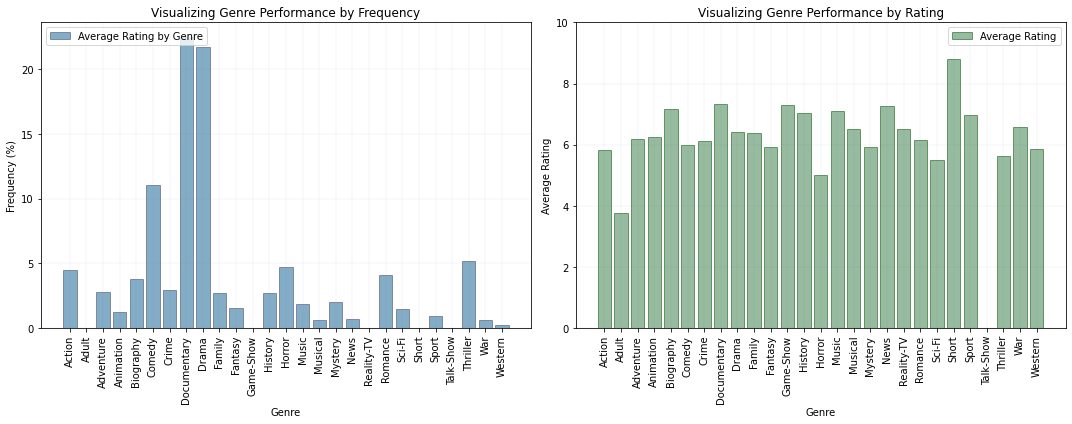

In [48]:
# plot a histogram to visualize movie average ratings and frequency of occurance based on genre

# create the plot with 2 figures side by side
fig, (ax1, ax2) = plt.subplots(figsize=(15, 6), ncols = 2)

# set the plot, format, and labels for the first bar graph measuring frequency of genres
ax1.bar(genre_count_proportion.index, genre_count_proportion.values,
       color = '#085b91',
       alpha = .5,
       edgecolor='#3d3d5c', 
       align='center', 
       label = 'Average Rating by Genre')
ax1.set_ylabel('Frequency (%)')
ax1.set_xlabel('Genre')
ax1.set_title('Visualizing Genre Performance by Frequency')
ax1.tick_params(axis='x', labelrotation=90)
ax1.grid(color='#666699', alpha = .5, linestyle='-', linewidth=0.1)
ax1.legend(loc='upper left')

# set the plot, format, and labels for the second bar graph measuring average rating of genres
ax2.bar(ratings_mean.index, ratings_mean.values,
       color = '#2F793E',
       alpha = .5,
       edgecolor='#004d00', 
       align='center', 
       label = 'Average Rating')
ax2.set_ylabel('Average Rating')
ax2.set_xlabel('Genre')
ax2.set_title('Visualizing Genre Performance by Rating')
ax2.tick_params(axis='x', labelrotation=90)
major_ticks = np.arange(0, 12, 2)
ax2.set_yticks(major_ticks)
ax2.grid(color='#666699', alpha = .5, linestyle='-', linewidth=0.1)
ax2.legend(loc = 'upper right')

# format the layout and display the graphs
fig.tight_layout()
plt.show()

#### Merge IMDB Movie Basics to The Numbers Movie Budget Dataset

In [49]:
# Set the index column for IMDB Movie Basics
IMDB_movie_basics.set_index('primary_title', inplace=True)
IMDB_movie_basics.head()

,movie_id,start_year,genres,genres_split
primary_title,,,,
Sunghursh,tt0063540,2013,"Action,Crime,Drama","[Action, Crime, Drama]"
One Day Before the Rainy Season,tt0066787,2019,"Biography,Drama","[Biography, Drama]"
The Other Side of the Wind,tt0069049,2018,Drama,[Drama]
Sabse Bada Sukh,tt0069204,2018,"Comedy,Drama","[Comedy, Drama]"
The Wandering Soap Opera,tt0100275,2017,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"


In [50]:
#Set the index column for the numbers movie budget 
TN_movie_budget.set_index('movie', inplace=True)
TN_movie_budget.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,
Avatar,1,"Dec 18, 2009","$425,000,000","$760,507,625","$2,776,345,279"
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875"
Dark Phoenix,3,"Jun 7, 2019","$350,000,000","$42,762,350","$149,762,350"
Avengers: Age of Ultron,4,"May 1, 2015","$330,600,000","$459,005,868","$1,403,013,963"
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017","$317,000,000","$620,181,382","$1,316,721,747"


In [51]:
full_movie_details = TN_movie_budget.merge(exploded_IMDB_basics, 
                     left_on='movie', right_on='primary_title')
full_movie_details.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross,primary_title,start_year,genres,genres_split
0,1,"Dec 18, 2009","$425,000,000","$760,507,625","$2,776,345,279",Avatar,2011,Horror,Horror
1,2,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy",Action
2,2,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy",Adventure
3,2,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy",Fantasy
4,3,"Jun 7, 2019","$350,000,000","$42,762,350","$149,762,350",Dark Phoenix,2019,"Action,Adventure,Sci-Fi",Action


In [52]:
# talk about non null - I do need to figure out why that one genre is empty in the visualization above
full_movie_details.isna().sum()

id                   0
release_date         0
production_budget    0
domestic_gross       0
worldwide_gross      0
primary_title        0
start_year           0
genres               0
genres_split         0
dtype: int64

In [53]:
distinct = len(pd.unique(full_movie_details['primary_title']))
print("Number of unique movies that we will analyze further:", distinct)

#talk about duplicates, how they will be addresssed - movies can have multiple genres

Number of unique movies that we will analyze further: 2299


In [54]:
# look at the merged dataset
full_movie_details.info()


#address in writeup that there are duplicate lines from exploding the genre, this will be 
#addressed in the further anlyssi by accounting only for the unique occurence wheere appropriate
#essentially only counting budget and gross product once not three times, but genres are counted 
#for each time it is listed, so maybe three genres for 1 monive.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7796 entries, 0 to 7795
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 7796 non-null   int64 
 1   release_date       7796 non-null   object
 2   production_budget  7796 non-null   object
 3   domestic_gross     7796 non-null   object
 4   worldwide_gross    7796 non-null   object
 5   primary_title      7796 non-null   object
 6   start_year         7796 non-null   int64 
 7   genres             7796 non-null   object
 8   genres_split       7796 non-null   object
dtypes: int64(2), object(7)
memory usage: 609.1+ KB


NEXT: 
 - convert production budget, domestic gross and worldwide to integer
 - just want year from release date - convert to date; I will want the month later too
 - address in writeup that there are duplicate lines from exploding the genre, this will be 
 - addressed in the further anlyssi by accounting only for the unique occurence wheere appropriate
 - essentially only counting budget and gross product once not three times, but genres are counted 
 - for each time it is listed, so maybe three genres for 1 monive.

In [55]:
full_movie_details['production_budget'] = full_movie_details['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)

In [56]:
full_movie_details['domestic_gross'] = full_movie_details['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)

In [57]:
full_movie_details['worldwide_gross'] = full_movie_details['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(int)

In [58]:
#full_movie_details['release_date'] = full_movie_details['release_date'].astype(date)
full_movie_details['release_date'] = pd.to_datetime(full_movie_details['release_date'])

In [59]:
full_movie_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7796 entries, 0 to 7795
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 7796 non-null   int64         
 1   release_date       7796 non-null   datetime64[ns]
 2   production_budget  7796 non-null   int64         
 3   domestic_gross     7796 non-null   int64         
 4   worldwide_gross    7796 non-null   int64         
 5   primary_title      7796 non-null   object        
 6   start_year         7796 non-null   int64         
 7   genres             7796 non-null   object        
 8   genres_split       7796 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 609.1+ KB


In [60]:
full_movie_details.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross,primary_title,start_year,genres,genres_split
0,1,2009-12-18,425000000,760507625,2776345279,Avatar,2011,Horror,Horror
1,2,2011-05-20,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy",Action
2,2,2011-05-20,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy",Adventure
3,2,2011-05-20,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy",Fantasy
4,3,2019-06-07,350000000,42762350,149762350,Dark Phoenix,2019,"Action,Adventure,Sci-Fi",Action


#### NEXT  - highest grossing domestic and worldwide & highest ROI domestic and worldwide

 - Look at genre most gross profit and then genre by worldwide
 - Then layer in years to see trends and gross production (maybe put this into decades to view by genre)
 - To look at return on investment
 - average budget by genre then compare to 
 - average domestic production
 - then compare to average worldwide production and calculate return
 - then analyze to understand what the true recommendation is - higher budget has higher return, what is the margin on low budget films, is it worth exploring those too



In [62]:
# find the average prodcution budget of each genres representation 
# in the merged full_movie_details dataset
prodcution_mean_genres = round(full_movie_details.groupby('genres_split')['production_budget'].
                               mean(), 0)
prodcution_mean_genres

genres_split
Action         62113567.0
Adventure      87224768.0
Animation      80393017.0
Biography      25134007.0
Comedy         33034950.0
Crime          27267023.0
Documentary    25195903.0
Drama          23613293.0
Family         47081135.0
Fantasy        65917549.0
History        33376667.0
Horror         18797024.0
Music          15928966.0
Musical        39391121.0
Mystery        22567731.0
News           34971429.0
Reality-TV      1000000.0
Romance        20478871.0
Sci-Fi         64281067.0
Sport          24735000.0
Thriller       26966707.0
War            23886792.0
Western        37382000.0
Name: production_budget, dtype: float64

In [63]:
# find the average domestic prodcution of each genres representation 
# in the merged full_movie_details dataset
domestic_gross_mean_genres = round(full_movie_details.groupby('genres_split')['domestic_gross'].
                                   mean(), 0)
domestic_gross_mean_genres

genres_split
Action          66303849.0
Adventure      101639523.0
Animation      111624579.0
Biography       33495078.0
Comedy          46500545.0
Crime           29795019.0
Documentary     30130986.0
Drama           28340758.0
Family          66638023.0
Fantasy         81021718.0
History         34547402.0
Horror          28113990.0
Music           30684556.0
Musical         99659999.0
Mystery         31197829.0
News            16327498.0
Reality-TV             0.0
Romance         28468048.0
Sci-Fi          83525871.0
Sport           35603957.0
Thriller        31568097.0
War             23294853.0
Western         31168969.0
Name: domestic_gross, dtype: float64

In [64]:
# find the average worldwide prodcution of each genres representation 
# in the merged full_movie_details dataset
global_gross_mean_genres = round(full_movie_details.groupby('genres_split')['worldwide_gross'].
                                   mean(), 0)
global_gross_mean_genres

genres_split
Action         176195570.0
Adventure      282314618.0
Animation      299792394.0
Biography       68414102.0
Comedy         102311418.0
Crime           64073213.0
Documentary     63297801.0
Drama           59307709.0
Family         155976435.0
Fantasy        215878463.0
History         73598908.0
Horror          62909387.0
Music           65469722.0
Musical        222123427.0
Mystery         68416838.0
News            57058196.0
Reality-TV             0.0
Romance         59643109.0
Sci-Fi         222667067.0
Sport           69619715.0
Thriller        76305338.0
War             53312666.0
Western         59788852.0
Name: worldwide_gross, dtype: float64

Visualization explanation - higher budget leans towards higher production
But that does not tell a full story - we need to evaluate return to understand the full scope of 
profitability

plot a histogram to visualize movie budget and the domestic gross production based on genre

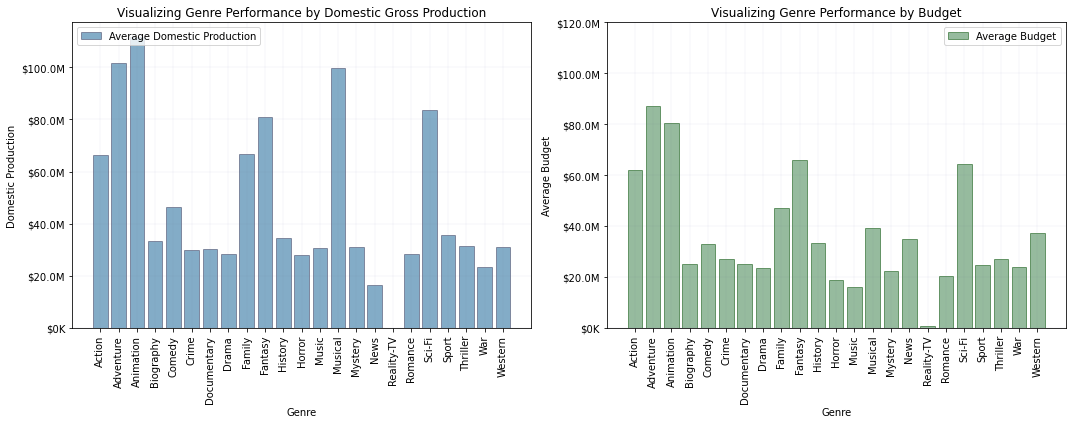

In [65]:
# this function is used for formatting the y axis without scientific notation
# cite: https://matplotlib.org/stable/tutorials/introductory/lifecycle.html#sphx-glr-tutorials-introductory-lifecycle-py
def currency(x, pos):
    if x >= 1e6:
        s = '${:1.1f}M'.format(x * 1e-6)
    else:
        s = '${:1.0f}K'.format(x * 1e-3)
    return s

# create the plot with 2 figures side by side
fig, (ax1, ax2) = plt.subplots(figsize=(15, 6), ncols = 2)

# set the plot, format, and labels for the first bar graph measuring average 
# domestic gross production
ax1.bar(domestic_gross_mean_genres.index, domestic_gross_mean_genres.values,
       color = '#085b91',
       alpha = .5,
       edgecolor='#3d3d5c', 
       align='center', 
       label = 'Average Domestic Production')
ax1.set_ylabel('Domestic Production')
ax1.set_xlabel('Genre')
ax1.set_title('Visualizing Genre Performance by Domestic Gross Production')
ax1.tick_params(axis='x', labelrotation=90)
ax1.grid(color='#666699', alpha = .5, linestyle='-', linewidth=0.1)
ax1.legend(loc='upper left')
ax1.yaxis.set_major_formatter(currency)
plt.ylim(0,120000000)

# set the plot, format, and labels for the second bar graph measuring average budget
ax2.bar(prodcution_mean_genres.index, prodcution_mean_genres.values,
       color = '#2F793E',
       alpha = .5,
       edgecolor='#004d00', 
       align='center', 
       label = 'Average Budget')
ax2.set_ylabel('Average Budget')
ax2.set_xlabel('Genre')
ax2.set_title('Visualizing Genre Performance by Budget')
ax2.tick_params(axis='x', labelrotation=90)
ax2.yaxis.set_major_formatter(currency)
ax2.grid(color='#666699', alpha = .5, linestyle='-', linewidth=0.1)
ax2.legend(loc = 'upper right')

# format the layout and display the graphs
fig.tight_layout()
plt.show()

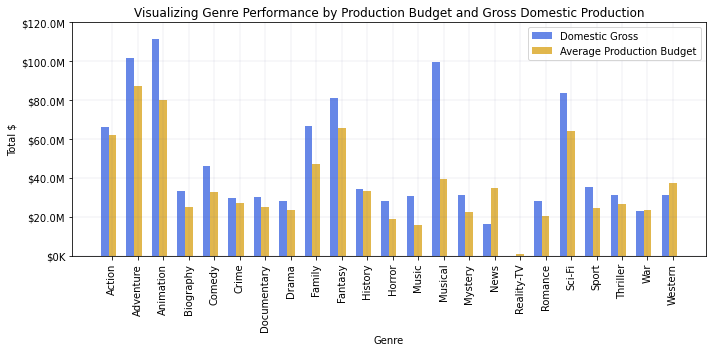

In [142]:
labels = domestic_gross_mean_genres.index

def currency(x, pos):
    if x >= 1e6:
        s = '${:1.1f}M'.format(x * 1e-6)
    else:
        s = '${:1.0f}K'.format(x * 1e-3)
    return s

x = np.arange(len(labels))
# cite: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
bar_width = 0.3
fig, ax = plt.subplots(figsize=(10,5))

ax1 = ax.bar(x - bar_width/2, 
             domestic_gross_mean_genres.values,
             width = 0.3, 
             color = 'royalblue', 
             alpha = .8, 
             label='Domestic Gross')
ax2 = ax.bar(x + bar_width/2, 
             prodcution_mean_genres.values, 
             width = 0.3,
             color = 'goldenrod',
             alpha = .8, 
             label='Average Production Budget')
ax.yaxis.set_major_formatter(currency)
plt.ylim(0,120000000)
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(domestic_gross_mean_genres.index.unique())
ax.tick_params(axis='x', labelrotation=90)
ax.grid(color='#666699', linestyle='-', linewidth=0.1)
ax.set_xlabel('Genre')
ax.set_ylabel('Total $')


# Add text for title labels
ax.set_title('Visualizing Genre Performance by Production Budget and Gross Domestic Production')
ax.legend()

fig.tight_layout()
plt.show()

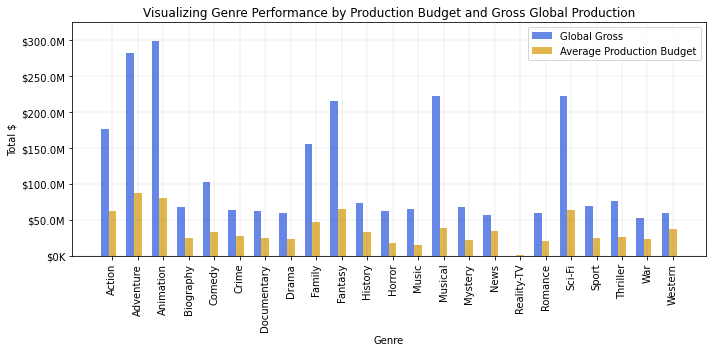

In [93]:
labels = global_gross_mean_genres.index

def currency(x, pos):
    if x >= 1e6:
        s = '${:1.1f}M'.format(x * 1e-6)
    else:
        s = '${:1.0f}K'.format(x * 1e-3)
    return s

x = np.arange(len(labels)) # the label locations
# cite: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

bar_width = 0.3
fig, ax = plt.subplots(figsize=(10,5))

ax1 = ax.bar(x - bar_width/2, 
             global_gross_mean_genres.values,
             width = 0.3, 
             color = 'royalblue', 
             alpha = .8, 
             label='Global Gross')
ax2 = ax.bar(x + bar_width/2, 
             prodcution_mean_genres.values, 
             width = 0.3,
             color = 'goldenrod',
             alpha = .8, 
             label='Average Production Budget')
ax.yaxis.set_major_formatter(currency)
plt.ylim(0,325000000)
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(global_gross_mean_genres.index.unique())
ax.tick_params(axis='x', labelrotation=90)
ax.grid(color='#666699', linestyle='-', linewidth=0.1)
ax.set_xlabel('Genre')
ax.set_ylabel('Total $')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Visualizing Genre Performance by Production Budget and Gross Global Production')
ax.legend()

fig.tight_layout()
plt.show()

### Calculate Return on Investment

ROI = ((amount gained - amount spent)/amount spent) * 100 to get us a percentage

In [87]:
ROI_domestic = round(((domestic_gross_mean_genres - prodcution_mean_genres) / 
                      prodcution_mean_genres) * 100, 2)
ROI_domestic

genres_split
Action           6.75
Adventure       16.53
Animation       38.85
Biography       33.27
Comedy          40.76
Crime            9.27
Documentary     19.59
Drama           20.02
Family          41.54
Fantasy         22.91
History          3.51
Horror          49.57
Music           92.63
Musical        153.00
Mystery         38.24
News           -53.31
Reality-TV    -100.00
Romance         39.01
Sci-Fi          29.94
Sport           43.94
Thriller        17.06
War             -2.48
Western        -16.62
dtype: float64

In [88]:
ROI_global = round(((global_gross_mean_genres - prodcution_mean_genres) / 
                      prodcution_mean_genres) * 100, 2)
ROI_global

genres_split
Action         183.67
Adventure      223.66
Animation      272.91
Biography      172.20
Comedy         209.71
Crime          134.98
Documentary    151.22
Drama          151.16
Family         231.29
Fantasy        227.50
History        120.51
Horror         234.68
Music          311.01
Musical        463.89
Mystery        203.16
News            63.16
Reality-TV    -100.00
Romance        191.24
Sci-Fi         246.40
Sport          181.46
Thriller       182.96
War            123.19
Western         59.94
dtype: float64

INSERT VISUALIZEATION - evaluate return to understand the full scope of 
profitability

In [98]:
import matplotlib.ticker as mtick

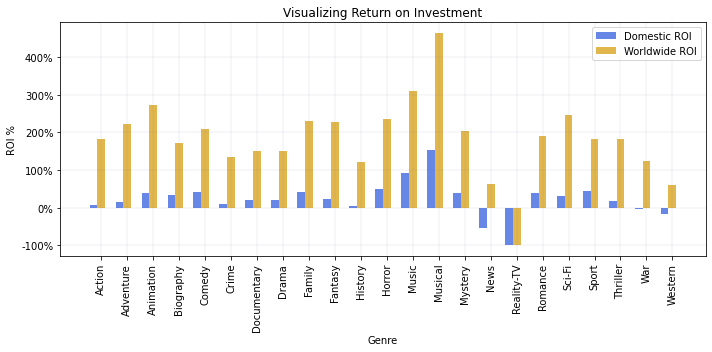

In [145]:
# Create the plot
fig, ax = plt.subplots(figsize=(10,5))

# Use plot() function to create a plot using above values
ax1 = ax.bar(np.arange(len(ROI_domestic.index)) - 0.3/2, ROI_domestic.values, 
       width = 0.3, 
       color = 'royalblue', 
       alpha = .8, 
       label='Domestic ROI')

ax2 = ax.bar(np.arange(len(ROI_global.index)) + 0.3/2, ROI_global.values, 
       width = 0.3, 
       color = 'goldenrod', 
       alpha = .8, 
       label='Worldwide ROI')

# Add a legend to the plot
ax.tick_params(axis='x', labelrotation=90)
ax.grid(color='#666699', linestyle='-', linewidth=0.1)
ax.set_xlabel('Genre')
xticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(xticks)
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(ROI_global.index.unique())
ax.set_ylabel('ROI %')
ax.legend()
ax.set_title('Visualizing Return on Investment')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%' CITE: https://www.codegrepper.com/code-examples/python/matplotlib+show+percentage+y+axis

fig.tight_layout()
plt.show()






### Business Recommendation 2

Which writer and director are most profitable and then connect it to the most profitable genre

I believe this is going to be achieved through IMDB 
I can connect a movie to the director and writer and the average rating of the movies associated with those directors all within the IMDB dataset

Then I could take the directors and writers and connect them to profitability and ROI from the numbers data base

### Business Recommendation 3

Holidays - thanksgiving and christmas
Summer time
Monthly

Seasonality of release (what time of year is most profitable and by most profitable and highest ROI genre as explored above
Exploring further from the information learned from above, I can look at the entire numbers database by release date and turn it into seasonality (winter, spring, summer, fall, or holidays) showing trends over time. Then I could layer in looking at it in this same manner but then also include genre as a variable for perspective.

## Next Steps

## Conclusion